In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import nltk

In [9]:
import pandas as pd
df_sms = pd.read_csv('MPC51.csv',encoding='latin-1')
df_sms.head()

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:

df_sms = df_sms.rename(columns={"type":"label", "email":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print(len(df_sms))

5572


In [12]:
df_sms.value_counts()

label  sms                                                                                                                                                                                                          
ham    Sorry, I'll call later                                                                                                                                                                                           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                              12
       Ok...                                                                                                                                                                                                            10
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£

In [13]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
# Create a new column 'length' with the length of each email
df_sms['length'] = df_sms['sms'].apply(len)

# Verify the new column has been added correctly
print(df_sms.head())

# Now you can describe the DataFrame again to include the 'length' column
print(df_sms.describe())

  label                                                sms  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61
            length
count  5572.000000
mean     80.118808
std      59.690841
min       2.000000
25%      36.000000
50%      61.000000
75%     121.000000
max     910.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

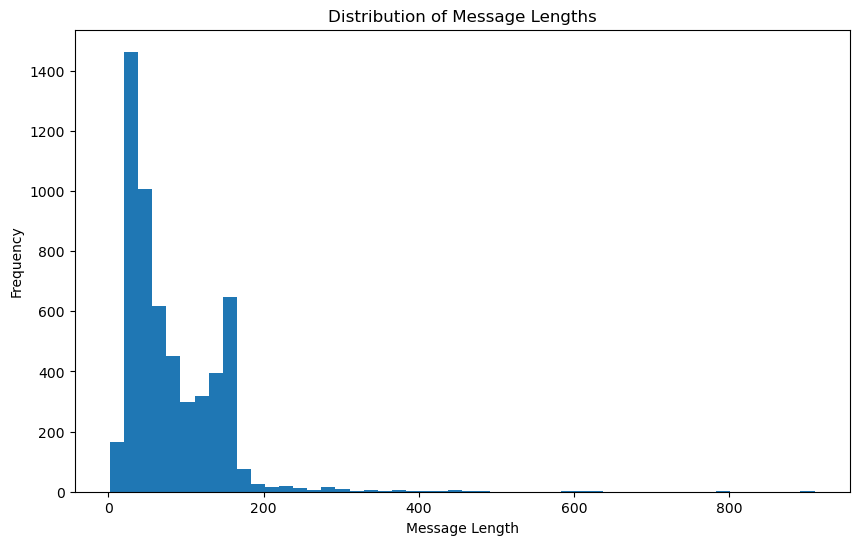

In [16]:
plt.figure(figsize=(10, 6))
df_sms['length'].plot(bins=50, kind='hist')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

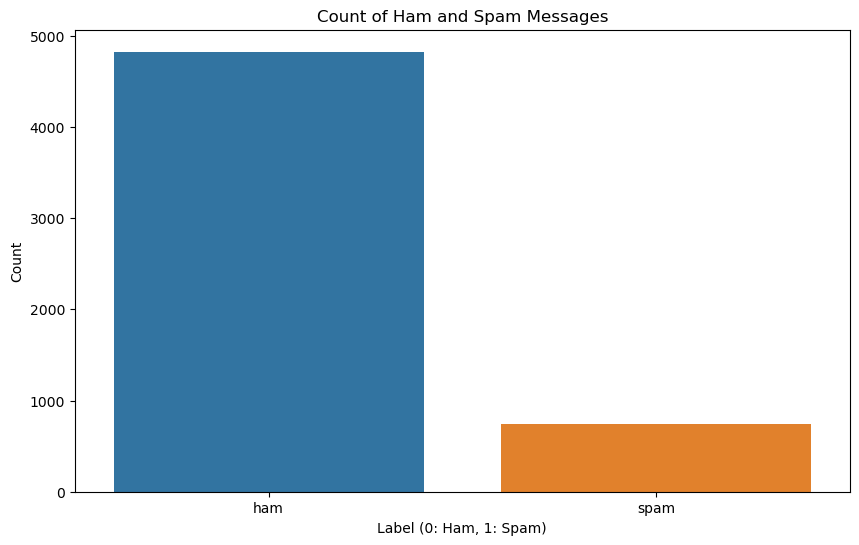

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_sms)
plt.title('Count of Ham and Spam Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'length'}>]], dtype=object)

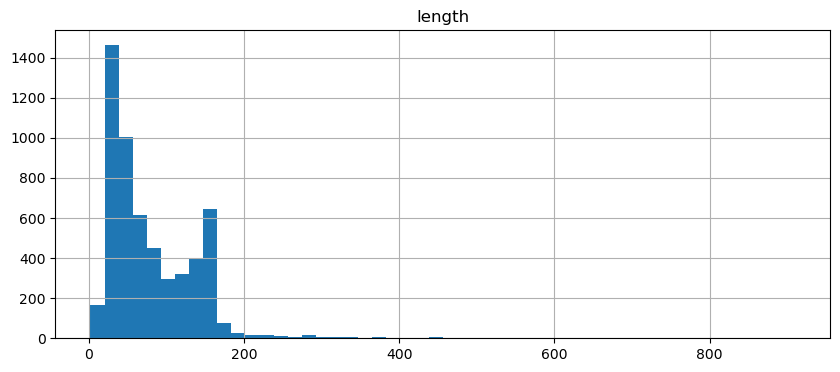

In [18]:
df_sms.hist(column='length'
, bins=50,figsize=(10,4))

In [19]:
print(df_sms.columns)

Index(['label', 'sms', 'length'], dtype='object')


In [20]:

df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


C:\Users\mawaf\AppData\Local\Temp\ipykernel_21576\1690081310.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61



Bag of words

In [21]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [22]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [23]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [24]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


Implementing bag of scikit learn


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

Data Preprocessing using vector and counter

In [26]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [27]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['label'],
                                                    df_sms['label'],test_size=0.20,
                                                    random_state=1)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
count_vector = CountVectorizer()
X = df_sms['sms']
y = df_sms['label'].map({'ham': 0, 'spam': 1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix
testing_data = count_vector.transform(X_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data ,X_train)
naive_bayes.score(testing_data, X_test)

0.09147982062780269

In [32]:
df_sms[type] = df_sms['label'].map({'ham':0,'spam':1})

In [33]:
print(df_sms)

      label                                                sms  length  \
0         0  Go until jurong point, crazy.. Available only ...     111   
1         0                      Ok lar... Joking wif u oni...      29   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...     155   
3         0  U dun say so early hor... U c already then say...      49   
4         0  Nah I don't think he goes to usf, he lives aro...      61   
...     ...                                                ...     ...   
5567      1  This is the 2nd time we have tried 2 contact u...     161   
5568      0              Will Ì_ b going to esplanade fr home?      37   
5569      0  Pity, * was in mood for that. So...any other s...      57   
5570      0  The guy did some bitching but I acted like i'd...     125   
5571      0                         Rofl. Its true to its name      26   

      <class 'pandas.core.frame.DataFrame'>  
0                                       NaN  
1                  

In [34]:
print(df_sms[df_sms['label'].isnull()])

Empty DataFrame
Columns: [label, sms, length, <class 'pandas.core.frame.DataFrame'>]
Index: []


In [35]:
df_sms['label'] = df_sms['label'].astype(int)

In [36]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [37]:
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
predictions = naive_bayes.predict(testing_data)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(X_test, predictions)))
print('Precision score(micro): {}'.format(precision_score(X_test, predictions, average ='micro')))
print('Recall score(micro): {}'.format(recall_score(X_test, predictions,average ='micro')))

Accuracy score: 0.09147982062780269
Precision score(micro): 0.09147982062780269
Recall score(micro): 0.09147982062780269
